In [60]:
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt

In [66]:
data = []
labels = []
h, w = 50, 120
dx, dy = 3, 2
# color = (0, 216, 0)

In [67]:
def make_frame():

  frames = []
  label = random.choice((0, 1))

  # for frame in range(1):
  if label == 0:
      x = 20
      y = h

      for _ in range(20):
        img = np.ones((h, w))*255
        # img = np.full((h, w), color, dtype=np.uint8)
        cv2.circle(img, (x, y), 4, (0), -1)
        x = x + dx
        y = y - dy
        labels.append(label)
        frames.append(img)

  elif label == 1:
      x = w-20
      y = 0

      for i in range(20):
        img = np.ones((h, w))*255
        cv2.circle(img, (x, y), 4, (0), -1)
        x = x - dx
        y = y + dy
        labels.append(label)
        frames.append(img)

  data.append(frames)

  return data, labels

In [68]:
dataset, labels = make_frame()
dataset = np.array(dataset)
labels = np.array(labels)

dataset.shape, labels.shape

((1, 20, 50, 120), (20,))

In [69]:
dataset = dataset[..., np.newaxis]
labels = labels[..., np.newaxis]

dataset.shape, labels.shape

((1, 20, 50, 120, 1), (20, 1))

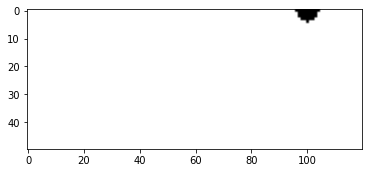

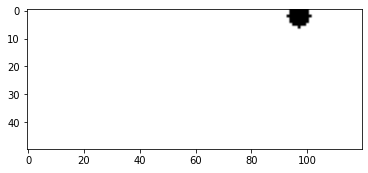

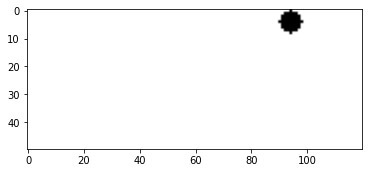

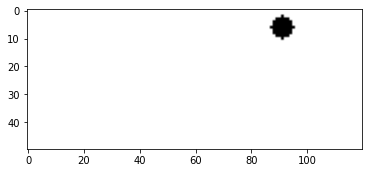

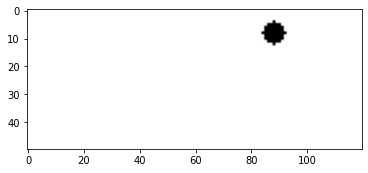

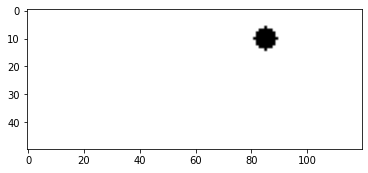

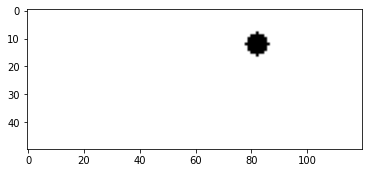

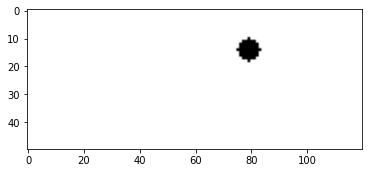

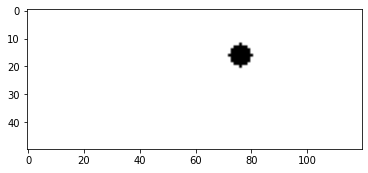

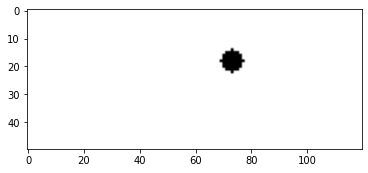

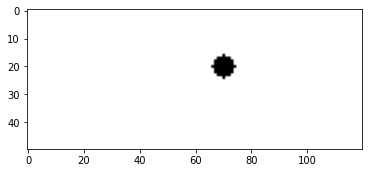

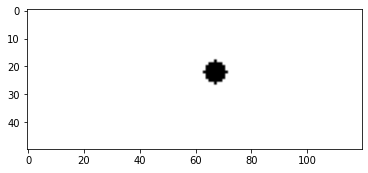

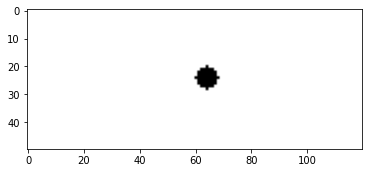

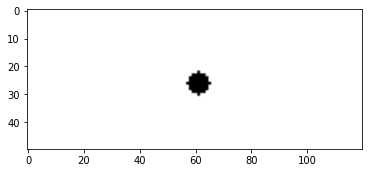

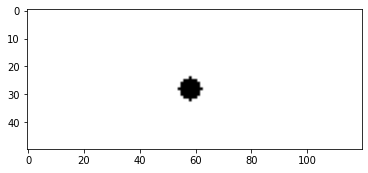

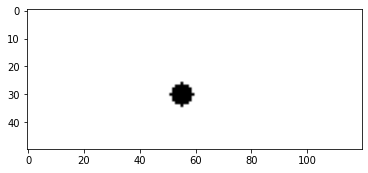

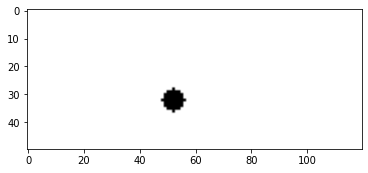

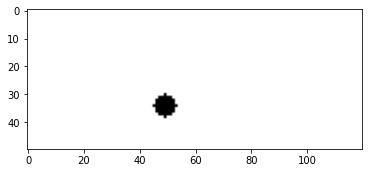

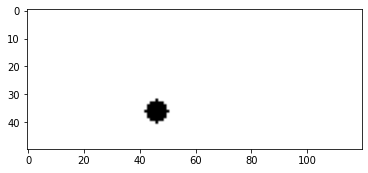

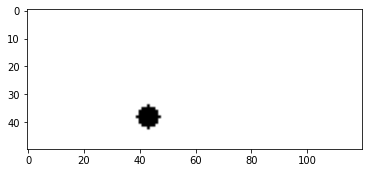

In [70]:
for frame in range(len(dataset[0, :])):
  plt.imshow(dataset[0, frame, :, :,0], cmap='gray')
  plt.show()